# KNN

In [444]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_Dataset()->tuple:
    num_samples_class_1 = 13
    num_samples_class_2 = 14
    num_samples_class_3 = 9
    cov = np.array(
        [[0.1,0],
        [0,0.1]]
    )
    data_1 = np.random.multivariate_normal(
        mean= np.array([1,-3]),
        cov = cov,
        size = num_samples_class_1
    )
    data_2 = np.random.multivariate_normal(
        mean= np.array([-1,-1]),
        cov = cov,
        size = num_samples_class_2
    )
    data_3 = np.random.multivariate_normal(
        mean= np.array([1,1]),
        cov = cov,
        size = num_samples_class_3
    )
    class_1 = np.array([0 for i in range(num_samples_class_1)])
    class_2 = np.array([1 for i in range(num_samples_class_2)])
    class_3 = np.array([2 for i in range(num_samples_class_3)])
    
    classes = np.concatenate([class_1 , class_2 , class_3])
    data = np.concatenate([data_1,data_2,data_3])
    return data, classes

In [445]:
x , y = generate_Dataset()

print(f"shape x: {x.shape} shape y: {y.shape}")
print(x.size)

print(f"x[3] = {x[3]} y[3]= {y[3]}")

shape x: (36, 2) shape y: (36,)
72
x[3] = [ 1.13074057 -3.49063015] y[3]= 0


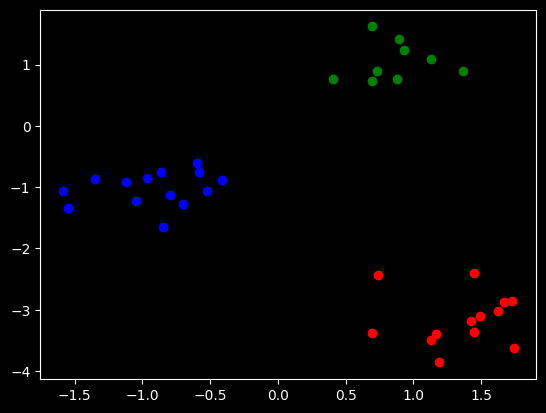

In [446]:

def plot_Data(x:np.ndarray, y:np.ndarray)->None:
    colors = ["red","blue","green"]
    for p,c in zip(x,y):
        plt.scatter(p[0],p[1], color = colors[c])
    plt.show()
    
plot_Data(x,y)

## KNN Implementation

In [447]:
class KNeighborClassifier:
    def __init__(self,k_neighbors = 5) -> None:
        '''
        initialize the classifier 

        Parameters
        ----------
        k_neighbors : int, optional
            number of neighbors to use for classification, by default 5
        '''
        self.n_neighbors = k_neighbors
        self.X: np.ndarray # Training set samples
        self.y: np.ndarray  #Training set lables
        self.num_classes : int # number of different lables
        
    def _distance(self,p1 :np.ndarray,p2 : np.ndarray) ->float:
        '''
        calculate the distance between two samples

        Parameters
        ----------
        p1 : np.ndarray
            sample 1
        p2 : np.ndarray
            sample 2

        Returns
        -------
        float
            _description_
        '''
        return np.linalg.norm(p2 - p1)
        
    def kneighbors(self,X: np.ndarray) -> np.ndarray:
        '''
        find the k nearest neigbors for the entire sample dataset X

        Parameters
        ----------
        X : np.ndarray
            all sample Data

        Returns
        -------
        np.ndarray
            indeceese of the k nearest Datapoints in the 
        '''
        # calc the distance for each "sample" in X (data to classifie) to each already existing feature in self.X 
        distances = np.array([[self._distance(sample, X_i)for X_i in self.X] for sample in X])# shape (sample,x_i) 
        sorted_dist_idxs = np.argsort(distances,axis= 1) #sort along the distances 
        k_next_idxs = sorted_dist_idxs[:,0:self.n_neighbors] #select all samples with the k nearest indxs
        return k_next_idxs
    
    def fit(self,X:np.ndarray,y:np.ndarray) -> None:
        '''
        initialize the trainDataSet

        Parameters
        ----------
        X : np.ndarray
            Training DataPoints
        y : np.ndarray
            Training Label
        '''
        self.X = X # already known feature Matrix 
        self.y = y # already known label Matrix
        self.num_classes = len(np.unique(y))
        
        
    def _voteclass(self,kneighbors_idxs :np.ndarray) -> np.ndarray:
        '''
        decide which class the Sample DataPoint depends to 

        Parameters
        ----------
        kneighbors_idxs : np.ndarray
            indeceese of the k neares neighbors

        Returns
        -------
        np.ndarray
            the class of the Sample DataPoint
        '''
        votes = np.zeros(shape=self.num_classes)
        neighbors_classes = self.y[kneighbors_idxs]
        for neighbor_class in neighbors_classes:
            votes[neighbor_class]+= 1
        voted_class = np.argmax(votes)
        return voted_class
        
    def pred(self,X:np.ndarray) -> np.ndarray:
        '''
        predict the lables of a Sample Dataset

        Parameters
        ----------
        X : np.ndarray
            Dataset

        Returns
        -------
        np.ndarray
            predicted class lables
        '''
        kneighbors_idxs = self.kneighbors(X)
        y_pred = np.array([self._voteclass(kneighbor_idxs) for kneighbor_idxs in kneighbors_idxs ])#shape()
        return y_pred
        
    #god/bad model
    def score(self, X:np.ndarray, y: np.ndarray) -> float:
        '''
        check the accrucy of the classifier

        Parameters
        ----------
        X : np.ndarray
            Sample DataSet
        y : np.ndarray
            the real lable Dataset

        Returns
        -------
        float
            score value [0,1]
        '''
        y_pred = self.pred(X)
        accuracy = np.mean(y_pred == y)
        return accuracy

In [448]:
x_test = np.array(
    [[-1.5,1.0], 
     [0.0,0.4]]
)
y_test = np.array(
    [1,2]
)

clf = KNeighborClassifier(k_neighbors=3)
clf.fit(x,y)

y_pred = clf.pred(x_test)
score = clf.score(x_test,y_test)
print(f'x_test:\n{x_test}')
print(f'y_test:\n{y_test}')
print(f'y_pred: \n{y_pred}')
print(f'score: \n{score}')


x_test:
[[-1.5  1. ]
 [ 0.   0.4]]
y_test:
[1 2]
y_pred: 
[1 2]
score: 
1.0


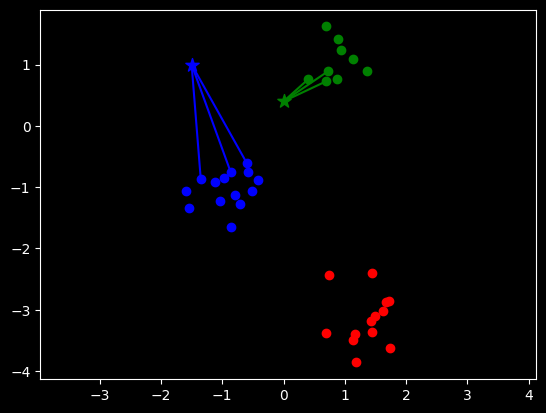

In [449]:

def plot_KNN_prediction(clf:KNeighborClassifier,
                        x_samples: np.ndarray,
                        X: np.ndarray,
                        y_pred:np.ndarray,
                        y:np.ndarray)->None:
    '''
    plot the KNN prediction 

    Parameters
    ----------
    clf : KNeighborClassifier
        Classifier to use
    x_samples : np.ndarray
        Sample DataPoints
    X : np.ndarray
        Train DataPoints
    y : np.ndarray
        Train DataLables
    '''
    colors = ["red","blue","green"]
    #plot existing dataset 
    for index,point in enumerate(X):
        plt.scatter(point[0],point[1], color = colors[y[index]])
    
    #classifie k nearest neighbors
    neighbors_idxs = clf.kneighbors(x_samples)
    
    #plot 
    for index, point in enumerate(x_samples):
        neighbors_points =clf.X[neighbors_idxs][index]
        neighbors_classes = clf.y[neighbors_idxs]
        neighbors_classes_i = neighbors_classes[index]
        plt.scatter(point[0],point[1], color = colors[y_pred[index]],marker= '*',s = 100)
        for neighbor_point, neighbor_class in zip(neighbors_points,neighbors_classes_i):
            plt.plot((neighbor_point[0],
                      point[0]),
                     (neighbor_point[1],
                      point[1]),
                     color = colors[neighbor_class],)

    plt.axis("equal")
    plt.show()
    
plot_KNN_prediction(clf, x_test, x,y_pred,y)